## Truc huynh References

### Material:
- [Pandas - Filter row and columns](https://python.plainenglish.io/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c)
- [Pandas - Drop multiple columns](https://pythonexamples.org/pandas-dataframe-delete-column/#5)
- [Pandas - Check Pandas data type](https://datascientyst.com/check-dtype-column-columns-pandas-dataframe/#:~:text=%20How%20to%20Check%20the%20Dtype%20of%20Column,Check%20if%20column%20is%20numeric%2C%20dateti...%20More%20)
- [Data - Columns Views - Original Data](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)
- [Pandas - Convert value in columns](https://stackoverflow.com/questions/52317459/python-pandas-convert-single-value-in-object-column)
- [Time Ranges/ Time Comparision](https://pythonawesome.com/time-ranges-with-python/)
- [AI BOOKS](http://aima.cs.berkeley.edu/)

## 1. Approach

- Check Nature processing Languages algorithm and approach
- Clean data & Tidy them
- Check for variable
- Check for keywords

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import json

## 2. Exploratory Data Analysis (EDA)

1. Decide if feature selection is needed.
    * Do you have hihgly correlated features?
2. Decide if you have non-scalar attributes.
3. What type of supervised learning is this?
    * Binary Classification
    * Multi-class classification?
    * Ordinal classification [Tricky]
        * Do you want to change this into regression or binarize into binary classification?
    * Regression
4. If doing classification
    1. Decide whether you class variable makes sense.
    2. Figure out what your class balance is
5. Histogram the features
    * Good if distribution is highly skewed
6. Vizualize using reduced dimensions
    * PCA, MVD
    * T-SNE

In [4]:
df = pd.read_csv("./data.csv")

In [5]:
df.shape

(30, 20)

In [6]:
df.head()

,#,jobid,country,country_code,current_url,date_posted,description,description_text,domain,job_title,location,region,company_link,company_name,job_type,company_rating,company_reviews_count,apply_link,date_posted_parsed,salary_formatted
0,1,00009f127a9e34a7,US,US,https://www.indeed.com/viewjob?jk=00009f127a9e...,22 days ago,<div>\n <p>The Treasury Analyst will assist th...,The Treasury Analyst will assist the Treasury ...,www.indeed.com,"Analyst, Treasury – Banking Retail",United States,NaN,https://www.indeed.com/cmp/The-Est%C3%A9e-Laud...,The Estée Lauder Companies,Full-time,4.0,2214.0,https://www.indeed.com/applystart?jk=00009f127...,2022-05-18T14:09:47.585Z,NaN
1,2,0001783849fce183,US,LB,https://www.indeed.com/viewjob?jk=0001783849fc...,30+ days ago,<p>At Harry’s the Store Associate / Foodservic...,At Harry’s the Store Associate / Foodservice A...,www.indeed.com,Store Associate/ Food Service Associate - Saco...,"Lebanon, ME",AS,"https://www.indeed.com/cmp/H-A-Mapes,-Inc?camp...",Harry's Convenience Stores,Part-time,NaN,NaN,NaN,NaN,From $14 an hour
2,3,00027f45e5373e13,US,US,https://www.indeed.com/viewjob?jk=00027f45e537...,30+ days ago,<div></div>\n<div>\n <div>\n <div>\n <b>ACC...,ACCENTURE's Flexible Workforce solves clients’...,www.indeed.com,Cloud Architect,United States,NaN,https://www.indeed.com/cmp/Accenture?campaigni...,Accenture,Contract,4.0,21827.0,https://www.indeed.com/applystart?jk=00027f45e...,NaN,NaN
3,4,00028cda307fcffa,US,AO,https://www.indeed.com/viewjob?jk=00028cda307f...,30+ days ago,<div>\n Company Description\n <p><b><br> Why W...,Company Description\n Why We Want You: Multi...,www.indeed.com,Maintenance Technician - $30+/hr Day Shift (El...,"Angola, IN 46703",AF,https://www.indeed.com/cmp/Techo--bloc?campaig...,Techo-Bloc,Full-time,3.1,114.0,NaN,NaN,From $30 an hour
4,5,000002c948819e54,US,AU,https://www.indeed.com/viewjob?jk=000002c94881...,30+ days ago,<div>\n <p>Working within the New York office ...,Working within the New York office the individ...,www.indeed.com,IT Senior Support Manager,"Brooklyn, NY",OC,https://www.indeed.com/cmp/Michael-Page?campai...,Michael Page,NaN,3.5,354.0,https://www.indeed.com/applystart?jk=000002c94...,NaN,NaN


## 3. Check Missing Values

In [7]:
# Set figure size
plt.rcParams["figure.figsize"]=13,11
sns.set(style='darkgrid')

<AxesSubplot:>

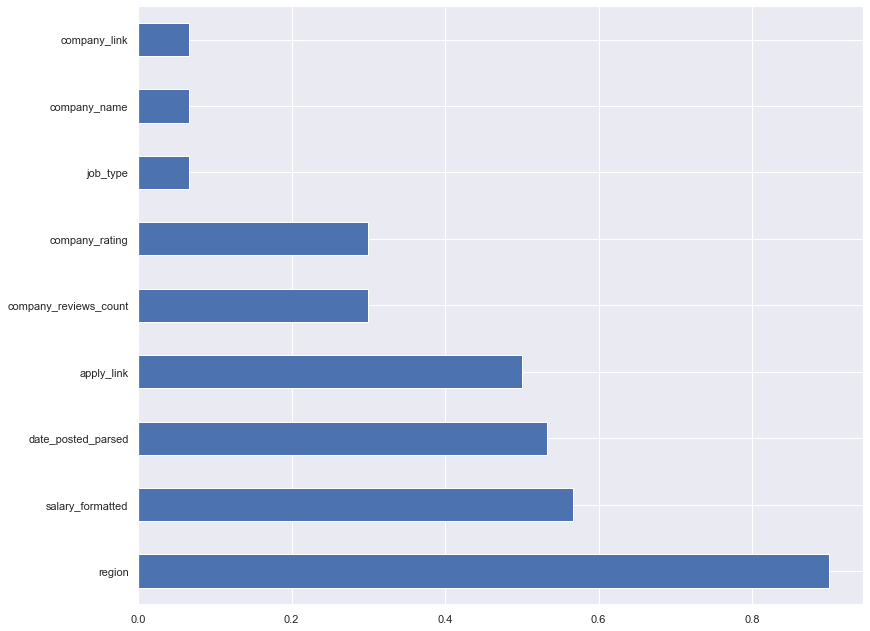

In [8]:
# Check out the missing values in percentage
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)

missing_percentage[missing_percentage!=0].plot(kind='barh')
